In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
df = pd.read_csv('../data/negative_comments/data.csv')

In [9]:
df['toxic']=df['toxic'].apply(int)
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [11]:
df['toxic'].value_counts()

toxic
0    9586
1    4826
Name: count, dtype: int64

In [16]:
for c in df[df['toxic']==0]['comment'].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [21]:
train_df, test_df = train_test_split(df, test_size=500)
test_df.shape

(500, 2)

In [23]:
test_df['toxic'].value_counts()
#Делаем из текста численые векторы
 

toxic
0    348
1    152
Name: count, dtype: int64

In [41]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language='russian')
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words=stopwords.words('russian')
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [44]:
print(f'Исходный текст: {sentence_example}')
print('==========================')
print(f'Токены: {tokens}')
print('==========================')
print(f'Токены без пунктуации: {tokens_without_punctuation}')
print('==========================')
print(f'Список русских стоп-слов: {russian_stop_words}')
print('==========================')
print(f'Токены без пунктуации и стоп-слов: {tokens_without_stop_words_and_punctuation}')
print('==========================')
print(f'Токены после стемминга:: {stemmed_tokens}')
print('==========================')

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
Список русских стоп-слов: ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 

In [46]:
#функция для применения всего этого к каждой записи:
snowball = SnowballStemmer(language='russian')
russian_stop_words=stopwords.words('russian')

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]  # Удаление пунктуации
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]  # Удаление стоп-слов
    tokens = [snowball.stem(i) for i in tokens]  # Стемминг
    return tokens

In [48]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [49]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [51]:
features = vectorizer.fit_transform(train_df['comment'])

In [53]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=0)

In [59]:
model.predict(features[2])

array([0], dtype=int64)

In [61]:
train_df['comment'].iloc[2]

'Объективная реальность как раз в том, что если множество людей определенным образом используют теги не по назначению , то это означает, что появилось какое-то другое неофициальное назначение. Даже если вам это не нравится, бессмысленно отрицать существование данного явления.\n'

In [65]:
#pipeline позволяет соединить создание фичей и модель
#model_pipeline позволит принимать обычный текст и по нему делать вывод о принадлежности коммента
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', LogisticRegression(random_state=0))
])

In [67]:
model_pipeline.fit(train_df['comment'], train_df['toxic'])

E:\Programs\AnacondaPython\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D4909E7240>)),
                ('model', LogisticRegression(random_state=0))])

In [73]:
model_pipeline.predict(['мир труд май!'])

array([0], dtype=int64)

In [76]:
model_pipeline.predict(['меня бесят эти негодяи, сколько можно прогибаться? устроим забастовку'])

array([1], dtype=int64)

In [79]:
#вычисление метрик качества:
#precision и recall
precision=precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))
recall=recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))
print('precision=', precision, 'recall=', recall)
#модель LogisticRegression возвращает вероятность попадания исследуемого комментария в одну из двух групп
#двигая порог можно изменить precision и recall

precision= 0.8035714285714286 recall= 0.5921052631578947


In [85]:
#prec, rec, thresholds - массивы
prec, rec, thresholds = precision_recall_curve(
    y_true=test_df["toxic"],
    probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1]
)

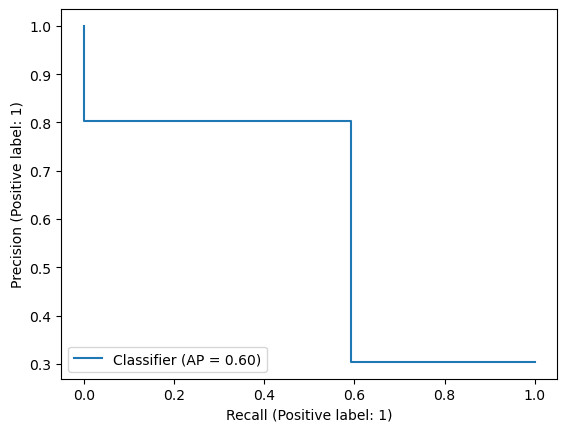

In [87]:
#стандартная функция получения кривой зависимости precision от recall из библиотеки scikitlearn
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(
    y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment'])
)

In [90]:
np.where(prec > 0.95)

(array([475, 476, 477, 478, 479, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
       dtype=int64),)

In [92]:
thresholds[475] #это порог, выше которого точность будет выше 0.95 

0.7816697528493818

In [94]:
#вызовем предсказание с этим порогом:
precision=precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:,1]>thresholds[475])

recall=recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:,1]>thresholds[475])
print('precision=', precision, 'recall=', recall)
#результат означает, что
#для подбора оптимальной комбинации воспользуемся классом GridSearch

precision= 0.9583333333333334 recall= 0.1513157894736842


In [98]:
#gridSearch подбирает такую модель, чтобы она соответствовала максимизации/минимизации, изменяя ее параметры
#для этого напишем пайплайн, в котором обернем логистическую регрессию в GridSearch
grid_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid={'C': [0.01, 1, 10]},  #мы перебираем 3 коэффициента регуляризации, стандартный - 1
        cv=3,
        verbose=4
    ))
])

In [99]:
grid_pipeline.fit(train_df['comment'], train_df['toxic'])

E:\Programs\AnacondaPython\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ............................C=0.01;, score=0.664 total time=   0.0s
[CV 2/3] END ............................C=0.01;, score=0.664 total time=   0.0s
[CV 3/3] END ............................C=0.01;, score=0.664 total time=   0.1s
[CV 1/3] END ...............................C=1;, score=0.834 total time=   0.1s
[CV 2/3] END ...............................C=1;, score=0.832 total time=   0.2s
[CV 3/3] END ...............................C=1;, score=0.847 total time=   0.2s


E:\Programs\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............................C=10;, score=0.868 total time=   0.4s


E:\Programs\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............................C=10;, score=0.864 total time=   0.6s


E:\Programs\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ..............................C=10;, score=0.873 total time=   0.4s


E:\Programs\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D492C60EA0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.01, 1, 10]}, verbose=4))])

In [101]:
model_pipeline_c10 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', LogisticRegression(random_state=0, C=10.))
])

model_pipeline_c10.fit(train_df['comment'], train_df['toxic'])

E:\Programs\AnacondaPython\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
E:\Programs\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D49485F880>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

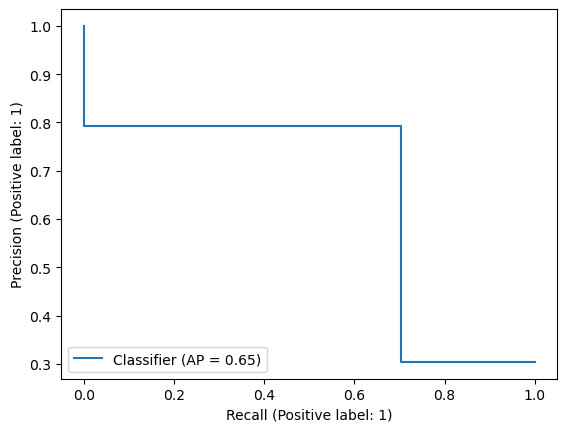

In [102]:
prec_c10, rec_c10, thresholds_c10 = precision_recall_curve(
    y_true=test_df["toxic"],
    probas_pred=model_pipeline_c10.predict_proba(test_df["comment"])[:, 1]
)

PrecisionRecallDisplay.from_predictions(
    y_true=test_df['toxic'], y_pred=model_pipeline_c10.predict(test_df['comment'])
)

In [103]:
np.where(prec_c10>0.95)

(array([458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
        471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
        484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496,
        497, 498, 499, 500], dtype=int64),)

In [105]:
precision=precision_score(y_true=test_df['toxic'], y_pred=model_pipeline_c10.predict_proba(test_df['comment'])[:,1]>thresholds_c10[458])

recall=recall_score(y_true=test_df['toxic'], y_pred=model_pipeline_c10.predict_proba(test_df['comment'])[:,1]>thresholds_c10[458])
print('precision=', precision, 'recall=', recall)
#увеличение recall говорит о том, что мы сможем найти больше плохих комментариев с высокой точностью (0.97)

precision= 0.975609756097561 recall= 0.2631578947368421
